# Quantum Support Vector Machines

In this notebook, we will use quantum circuits to compute a kernel that we will later use in a classical SVM. We will use Qiskit's implementation, that already encapsulates the kernel matrix computation and the SVM training.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.ml.datasets import breast_cancer
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 1234
algorithm_globals.random_seed = seed

We will start with a very simple example that is clearly linearly separable.

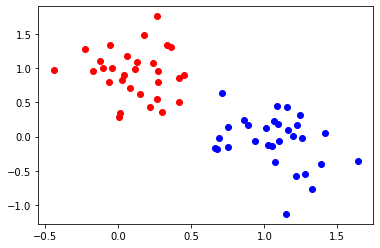

In [11]:
np.random.seed(1234)
n = 30

# Training examples for class 0

mean = [0, 1]
cov = [[0.1, 0], [0, 0.1]]

A = (np.random.multivariate_normal(mean, cov, n))
x_A, y_A = A.T
plt.plot(x_A, y_A, 'ro');

# Training examples for class 1

mean = [1, 0]
cov = [[0.1, 0], [0, 0.1]]

B = (np.random.multivariate_normal(mean, cov, n))
x_B, y_B = B.T
plt.plot(x_B, y_B, 'bo');

To encode the data, we use the ZZFeatureMap in dimension 2 with linear entaglement.

In [12]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

After we have generated the training data and defined the feature map, we can now train the QSVM. 

In [14]:
training_input = np.append(A,B,axis =0)
training_labels = np.array([0]*n+[1]*n) # Training labels are 0 and 1 


backend = QuantumInstance(Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

qsvm = QSVC(quantum_kernel=kernel)

qsvm.fit(training_input, training_labels)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x14d26cc40>,
     random_state=1234, shrinking=True, tol=0.001, verbose=False)

To test the performance, we are going to generate test data according to the same distributions used for training.

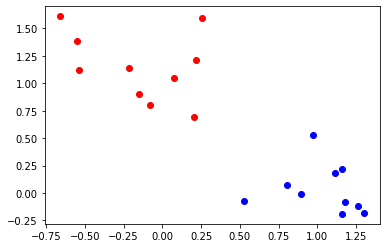

In [15]:
n = 10

# Test examples for class 0

mean = [0, 1]
cov = [[0.1, 0], [0, 0.1]]

C = (np.random.multivariate_normal(mean, cov, n))
x_C, y_C = C.T
plt.plot(x_C, y_C, 'ro');

# Test examples for class 1

mean = [1, 0]
cov = [[0.05, 0], [0, 0.05]]

D = (np.random.multivariate_normal(mean, cov, n))
x_D, y_D = D.T
plt.plot(x_D, y_D, 'bo');


We now use the trained QSVM to predict the class of the test examples. We can also compute the accuracy directly if we provide the labels. 

In [17]:
print("Prediction for examples in test class 0",qsvm.predict(C))
print("Prediction for examples in test class 1",qsvm.predict(D))

test_input = np.append(C,D,axis =0)
test_labels = np.array([0]*n+[1]*n)

print("Accuracy:",qsvm.score(test_input,test_labels))

Prediction for examples in test class 0 [0 0 0 0 0 0 0 0 1 1]
Prediction for examples in test class 1 [1 1 1 1 1 1 1 1 1 1]
Accuracy 0.9


We can also use datasets already included in QISkit

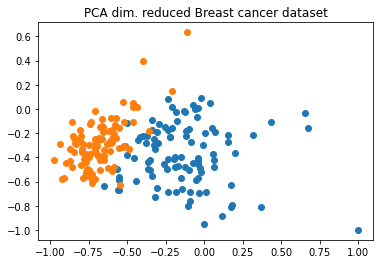

In [25]:
sample_Total, train_input, test_input, class_labels = breast_cancer(
    training_size=100,
    test_size=10,
    n=2,
    plot_data=True
)
dataA,dataB = train_input['A'],train_input['B']
training_input = np.append(dataA, dataB, axis=0)
training_labels = np.array([0]*len(dataA)+[1]*len(dataB))
testA,testB = test_input['A'],test_input['B']
testing_input = np.append(testA, testB, axis=0)
testing_labels = np.array([0]*len(testA)+[1]*len(testB))

We first use a simple feature map

In [23]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [26]:
qsvm = QSVC(quantum_kernel=kernel)

qsvm.fit(training_input, training_labels)

score = qsvm.score(testing_input, testing_labels)
print("Accuracy: ", score)

Accuracy:  0.8


We now use a more sophisticated feature map

In [29]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [30]:
qsvm = QSVC(quantum_kernel=kernel)
qsvm.fit(training_input, training_labels)
score = qsvm.score(testing_input, testing_labels)
print("Accuracy: ", score)

Accuracy:  0.85


<h3>QISkit tutorial</h3>
<a href="https://qiskit.org/documentation/machine-learning/tutorials/03_quantum_kernel.html">(link)</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
algorithm_globals.random_seed = seed

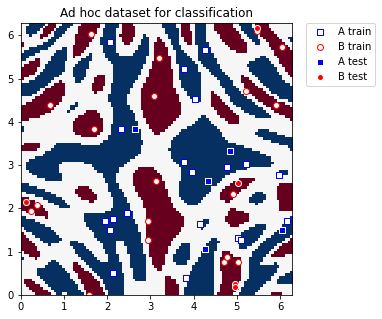

In [2]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")

plt.show()

In [3]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [4]:
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_features, train_labels)
adhoc_score = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score: {adhoc_score}")

Callable kernel classification test score: 1.0


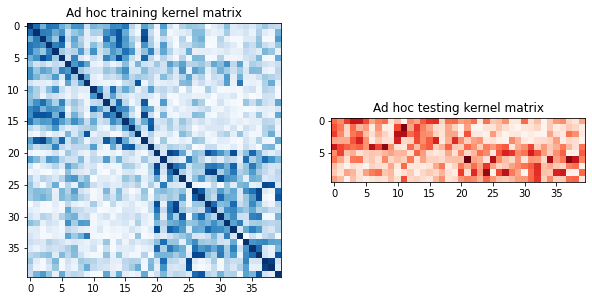

Precomputed kernel classification test score: 1.0


In [5]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")
plt.show()

adhoc_svc = SVC(kernel="precomputed")
adhoc_svc.fit(adhoc_matrix_train, train_labels)
adhoc_score = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score}")

In [6]:
qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 1.0


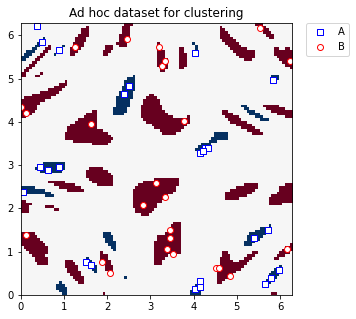

In [7]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=25,
    test_size=0,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)
plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for clustering")

plt.show()

In [8]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

adhoc_backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

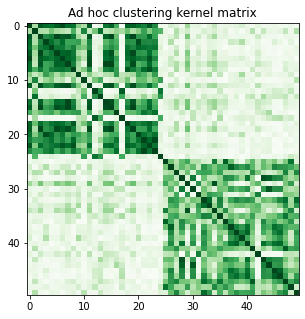

Clustering score: 0.7287008798015754


In [9]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")